# Milestone 2
## 1.Introduction
`Fachmi Maris`

Batch 002

### Source :
https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification


### Objectives
Milestones 2 are created to evaluate Phase 1 Learning:

- Able to understand the concepts of supervised learning and unsupervised learning
- Able to prepare data for use in supervised learning or unsupervised learning models
- Able to implement supervised learning or unsupervised learning with new datasets
- Able to evaluate the model
- Able to do model tuning
- Able to do model deployment

### Context
An entrepreneur named Bob wants to start his cellular company. He wants to enter the market which is already controlled by well-known brands such as Samsung, Apple, Xiaomi, etc.
He didn't know how to estimate the price of the cell phone he made. In today's very tight business competition, one cannot rely solely on assumptions. He collects cell phone sales data from various companies. Bob wants to know the relationship between the phone's features (eg: - RAM, Internal Memory, etc) and the selling price. But he is not very good at Machine Learning. So he needed the help of researchers to solve this problem. In this study, Bob did not ask for actual price predictions but only needed a classification of whether a cellphone with certain specifications was cheap or expensive. For Bob, the price of cellphones is considered cheap, around under 3,000,000 rupiah or around under 215$. Expensive phones are rated if their price is above 215$.

### PROBLEM STATEMENT
Create a Classification model to predict price_range using the saved dataset.


## 2.Import Library

In [1]:
# Define Librearies
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


#For Classifer Problem
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Split Dataset and Standarize Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor


#For Selection Features
from sklearn.feature_selection import f_classif, mutual_info_classif, SelectKBest

#Evaluate Regression Models
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay,confusion_matrix 

#Error and Display Setting
pd.set_option('display.max_column', None)
pd.set_option('display.max_rows',100)
import warnings
warnings.filterwarnings('ignore')
#For Deploy
import pickle
from sklearn import set_config

## 3.Data Loading

Loading dataset into Visual Studio Code

In [2]:
df = pd.read_csv("Mobile_Price_Classification.csv")

the code above is to call the dataset obtained from kaggle where the dataset was prepared by a cellphone entrepreneur named Bob.

In [3]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,1
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


Returns a dataframe with a variable named df

Attributes Dictionary
- `battery power`   : Total energy a battery can store in one time, measured in mAh
- `blue`            : has bluetooth or not(1 = yes, 0 = no)
- `clock speed`     : speed at which microprocessor executes instructions
- `dual_sim`        : has dual sim support or not(1 = yes, 0=no)
- `fc`              : front camera mega pixels
- `four_g`          : has 4G or not(1=yes ,0=no)
- `int_memory`      : internal memory in gigabytes
- `m_dept`          : mobile depth in cm
- `mobile_wt`       : weight of mobile phone
- `n_cores`         : number of cores of processor
- `pc`              : primary camera mega pixels
- `px_height`       : pixel resolution height
- `px_width`        : pixel resolution width
- `ram`             : random access memory in mega bytes
- `sc_h`            : screen height of mobile in cm
- `sc_w`            : screen width of mobile in cm
- `talk_time`       : longest time that a single battery charge will last(hours)
- `three_g`         : has 3G or not(1=yes , 0=no)
- `touch_screen`    : has touch screen or not(1=yes,0=no)
- `wifi`            : has wifi or not(1=yes,0=no)
- `price_range`     : the target variable with value of 
                    (0=cheap price(,<=215$),1=expensive price(>215$))

In [4]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,0


Returns the first 5 rows of the dataset.

In [5]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,1
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,1


Returns the last 5 rows of the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Based on the information data above, it can be seen that this dataset consists of data type int64 and float. The dataset consists of 2000 rows and 21 columns where there is no missing data in each row of data.

In [7]:
df[df.duplicated()].shape

(0, 21)

no found date duplicated

In [8]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

No found missing values

In [9]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         2
dtype: int64

By using the unique function for dataframes, it can be ensured that features that only consist of 2 unique are categorical data.

In [10]:
print('Number of rows are :',df.shape[0], ',and number of columns are :',df.shape[1])

Number of rows are : 2000 ,and number of columns are : 21


In [11]:
numerical = ['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']
categorical = ['blue', 'dual_sim','four_g','three_g','touch_screen','wifi','price_range']

The dataset is divided into numeric data and categorical data

In [12]:
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0
pc,2000.0,9.91650,6.064315,0.0,5.00,10.0,15.00,20.0
px_height,2000.0,645.10800,443.780811,0.0,282.75,564.0,947.25,1960.0
px_width,2000.0,1251.51550,432.199447,500.0,874.75,1247.0,1633.00,1998.0


Based on the results of the describe function above, it is known that there are no oddities or data anomalies in the numeric data, such as a missing value in the form of a value of 9999, symbols such as a question mark (?), etc. Thus, this data can be processed at a later stage up to modeling.

In [13]:
for i in categorical:
    print(i)
    print()
    print(df[i].value_counts())
    print('-' * 10)

blue

0    1010
1     990
Name: blue, dtype: int64
----------
dual_sim

1    1019
0     981
Name: dual_sim, dtype: int64
----------
four_g

1    1043
0     957
Name: four_g, dtype: int64
----------
three_g

1    1523
0     477
Name: three_g, dtype: int64
----------
touch_screen

1    1006
0     994
Name: touch_screen, dtype: int64
----------
wifi

1    1014
0     986
Name: wifi, dtype: int64
----------
price_range

0    1000
1    1000
Name: price_range, dtype: int64
----------


View the results of the function to see the number of unique data contained in each categorical column.

Based on the initial review, information was obtained: - No duplicate data was found. - No missing values found. - Data is divided into numerical data and categorical data.

### Data Cleaning

In [14]:
#duplicated data
df_clean = df.copy()
df_clean.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,1


Duplicate data so as not to change the initial dataset.

## 4.Exploratory Data Analysis (EDA) for Analysis Purpose

In [15]:
df_clean['price_range'].value_counts().reset_index()

,index,price_range
0,0,1000
1,1,1000


<AxesSubplot:>

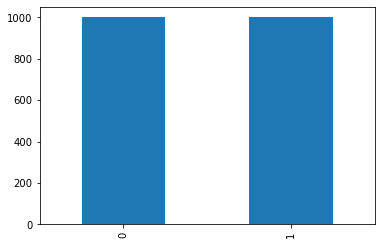

In [16]:
df_clean['price_range'].value_counts().plot(kind = 'bar')

Based on the visualization above, it is known that the number of cellphones that are considered cheap (class 0) and expensive (class 1) is balanced, namely 1000 data for cellphones that are considered cheap and 1000 data for expensive cellphones. So that the target column does not experience imbalance data, aka the data in the target column is balanced.

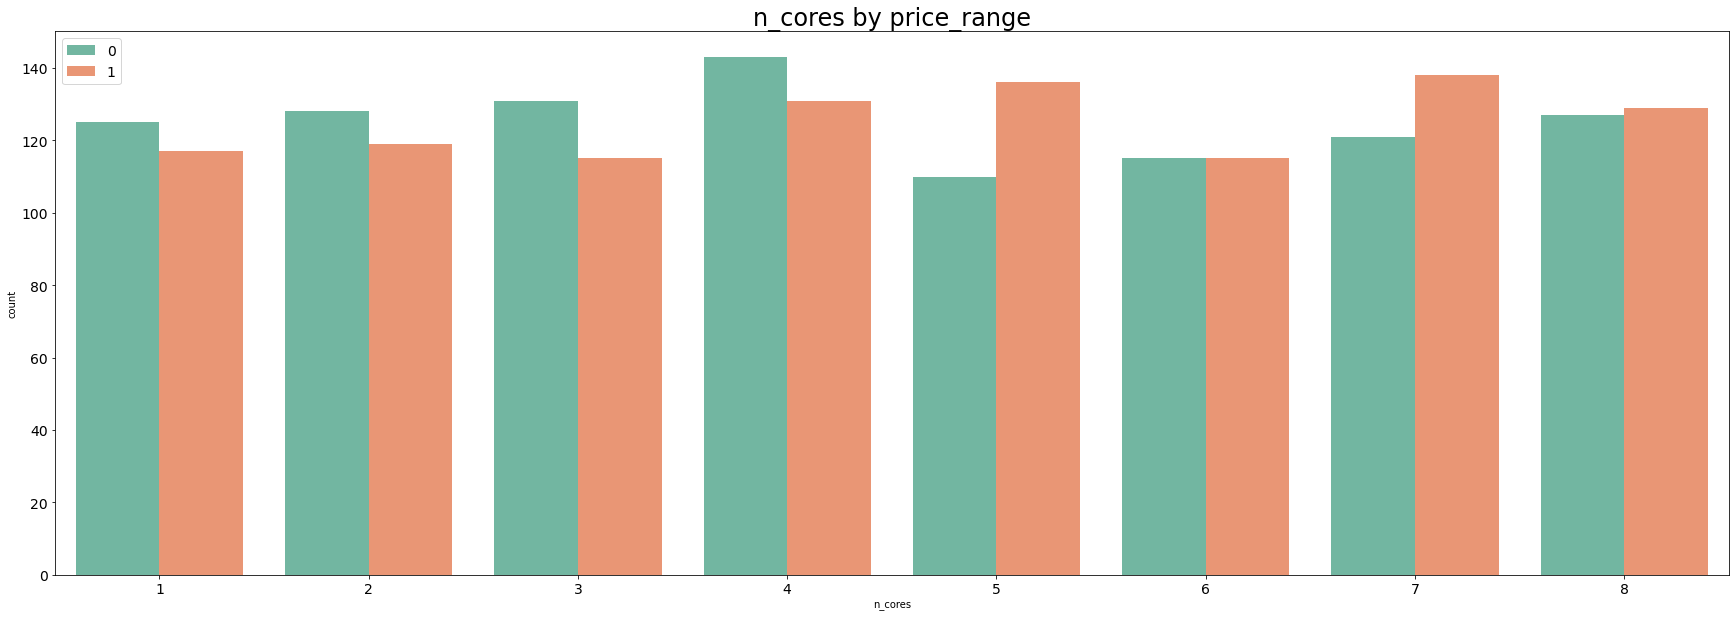

In [17]:
plt.figure(figsize = (30,10))
plt.title('n_cores by price_range', fontsize=24)
sns.countplot(data=df_clean.sort_values(by='n_cores'), x='n_cores', hue='price_range', palette="Set2")
plt.xticks( fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=2, fontsize=14)
plt.show()

Based on the visualization above, it is known that the most cheap cellphones have a processor 4 while the most expensive cellphones have a processor 5 or 7 processors.

<AxesSubplot:xlabel='price_range', ylabel='talk_time'>

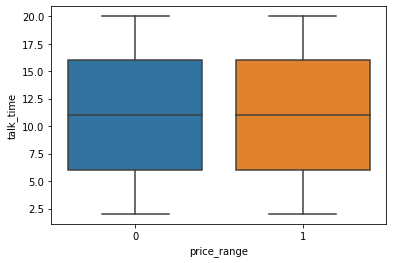

In [18]:
sns.boxplot(data=df_clean, x='price_range', y='talk_time')

talktime is the longest time a battery charge will last.
cheap cell phones and expensive cell phones have a talktime duration of about 7.5 hours to about 15 hours

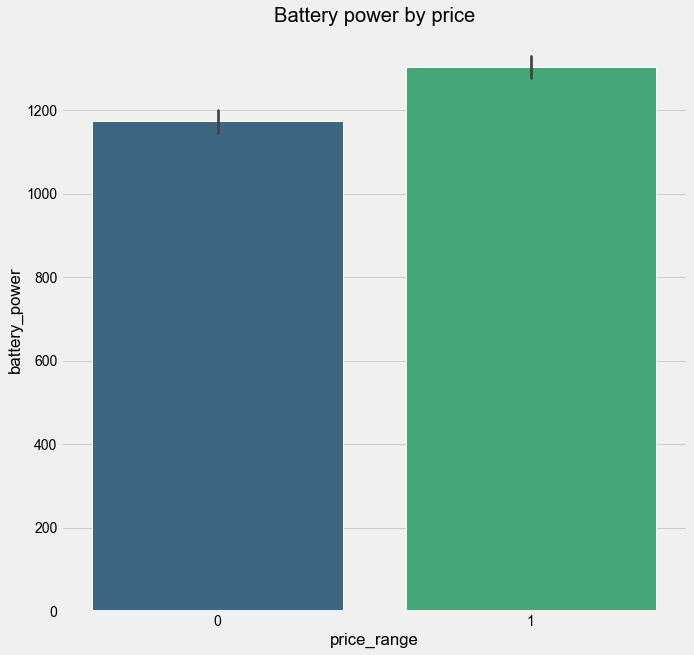

In [19]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(10,10))
plt.title("Battery power by price")
sns.set(font_scale=1)
sns.barplot(data=df, y="battery_power",x="price_range",palette="viridis")
plt.show()

Based on the visualization above, it is known that cheap cellphones have a maximum battery capacity of less than 1200 mAh while expensive cellphones have a maximum battery capacity of more than 1200 mAh. To be exact, it reaches 1998 mAh.

In [20]:
px.box(df,x='price_range',y='ram',
       color='price_range',template='ggplot2',
       labels={'price_range':'Price Range',
               'ram':'ram'},
       title="<b>Effect of Ram Capacity on Price")

Based on the visualization above, it is known that the lowest RAM on a cheap cellphone has 256 mb and the highest has 2881 mb of RAM. Expensive phones have RAM as low as 1185 mb and as high as 3998 mb.

EDA for analysis is carried out for simple data analysis with the aim of seeing the relationship between several columns. The following are the results of the EDA for analysis:
1. In the target column, namely the `price_range` column, it is known that there are 1000 buyers of cheap cellphones and expensive cellphones each.
2. Cheap cellphones use the most processor 4 and expensive cellphones use the most processor 5 and processor 7.
3. Talktime for cheap and expensive cell phones has a taktime duration of around 7.15 hours to around 15 hours.
4. Cheap cellphones don't have a battery capacity of 1200 mAh, while expensive cellphones have a maximum capacity of 1998 mAh.
5. Cheap cellphones have the lowest RAM of only 256mb, the average range is between 703mb to 1700mb and the highest reaches 2881mb. Expensive cellphones, have RAM as low as 1185mb, the average has a range between 2547mb to 3555mb and the highest reaches 3998mb.

### Split data into Train, Test and Inference
This step is to separate the sample before splitting the data for the inference model in the final stage.

In [21]:
inference = df_clean.sample(10, random_state=17)
inference

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
828,1965,0,0.5,0,6,1,4,1.0,84,7,9,977,1660,3535,17,0,16,1,1,1,1
914,694,1,1.8,1,15,0,36,0.4,193,4,20,983,1230,3676,12,8,5,1,0,1,1
331,1867,0,2.3,0,0,1,9,0.1,191,6,3,712,1442,990,6,1,2,1,0,1,0
1706,930,0,2.1,1,0,0,54,0.9,80,1,13,1569,1763,1743,7,1,9,0,1,0,1
117,1084,1,2.6,0,3,1,40,0.9,107,3,11,322,771,1945,15,4,10,1,1,0,0
1036,688,0,2.5,1,0,0,57,0.8,131,7,3,426,1964,3745,17,1,4,0,1,0,1
354,848,1,2.1,1,10,1,19,0.8,148,7,18,176,1029,3359,10,0,14,1,0,0,1
51,1760,0,1.4,1,5,0,63,0.8,127,8,19,1382,1383,2053,19,12,16,0,1,0,1
686,1527,0,2.7,0,10,1,60,0.1,154,5,14,526,1116,2078,5,3,11,1,1,1,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,1


Setting up data inference from df_clean. data inference is data that represents data from the real world. This data inference will be used in model inference which aims to test the model that has been made to work or not when new data is entered besides train data and test data

In [22]:
df_clean = df_clean.drop(inference.index)

Separate data inference from variable data df_clean.

In [23]:
print('Number of rows are :',df_clean.shape[0], ',and number of columns are :',df_clean.shape[1])

Number of rows are : 1990 ,and number of columns are : 21


In [24]:
df_clean.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,1


After the data inference is separated, df_clean is reduced to 1990 rows and 21 columns. Determine between features and targets. It can be seen in this study that the target column is in the `price_range` column which we can set as the y variable, meanwhile besides the target column is the feature column which we set as the X variable.

In [25]:
X = df_clean.drop('price_range', axis=1)
y = df_clean['price_range']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

for i in [X_train, X_test, y_train, y_test]:
    print(i.shape)

(1492, 20)
(498, 20)
(1492,)
(498,)


Dividing the data from the df_clean variable into 4 parts, namely X_train, X_test, y_train, and y_test. Variable X is the variable for training and variable Y is the variable for the test. The division is 75% for training data and 25% for test data. The training data consists of 1492 rows and the test data consists of 498 rows.

In [26]:
df_eda = pd.concat([X_train, y_train], axis=1)
testing = pd.concat([X_test, y_test], axis=1)

df_eda.shape

(1492, 21)

>Combine X_train and y_train into data train with df_eda variable.

>Combine X_test and y_test into test data with variable testing.

Combine data from the separated X and Y variables and then named the df_eda variable. This merge is for training data. The test data is different from the training data when the preprocessing data comes from training data.

The process of dividing data into 3 dataframes, namely:
- Inference data that will be used for model testing after the model evaluation is 10 sample data
- data train with a magnitude of 75% of the data
- test data with a magnitude of 25% of the data

The determination of the target column and feature column is written with y for the target and x for the feature

### EDA FOR MODELING

In [27]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1492 entries, 1384 to 1171
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1492 non-null   int64  
 1   blue           1492 non-null   int64  
 2   clock_speed    1492 non-null   float64
 3   dual_sim       1492 non-null   int64  
 4   fc             1492 non-null   int64  
 5   four_g         1492 non-null   int64  
 6   int_memory     1492 non-null   int64  
 7   m_dep          1492 non-null   float64
 8   mobile_wt      1492 non-null   int64  
 9   n_cores        1492 non-null   int64  
 10  pc             1492 non-null   int64  
 11  px_height      1492 non-null   int64  
 12  px_width       1492 non-null   int64  
 13  ram            1492 non-null   int64  
 14  sc_h           1492 non-null   int64  
 15  sc_w           1492 non-null   int64  
 16  talk_time      1492 non-null   int64  
 17  three_g        1492 non-null   int64  
 18  touch

In [28]:
for i in df_eda.columns.tolist():
    print(f'num of unique label in {i}: ', len(df_eda[i].unique()))

num of unique label in battery_power:  943
num of unique label in blue:  2
num of unique label in clock_speed:  26
num of unique label in dual_sim:  2
num of unique label in fc:  19
num of unique label in four_g:  2
num of unique label in int_memory:  63
num of unique label in m_dep:  10
num of unique label in mobile_wt:  121
num of unique label in n_cores:  8
num of unique label in pc:  21
num of unique label in px_height:  958
num of unique label in px_width:  938
num of unique label in ram:  1243
num of unique label in sc_h:  15
num of unique label in sc_w:  19
num of unique label in talk_time:  19
num of unique label in three_g:  2
num of unique label in touch_screen:  2
num of unique label in wifi:  2
num of unique label in price_range:  2


Based on the information above, it explains the large number of unique values in each column. We can classify these features into 2 groups, namely numerical data and categorical data. Categorical data in this study only consisted of 2 unique yes or no. The rest goes into the numeric feature.

In [29]:
num = ['battery_power','clock_speed','fc','int_memory','m_dep','mobile_wt','n_cores','pc','px_height','px_width','ram','sc_h','sc_w','talk_time']
cat = ['blue','dual_sim','four_g','three_g','touch_screen','wifi','price_range']

Inserts numeric columns into the `num` variable and categorical columns into the `cat` variable. The goal is to simplify the next process.

In [30]:
print('Number of rows are :',df_eda[num].shape[0], ',and number of columns are :',df_eda[num].shape[1])

Number of rows are : 1492 ,and number of columns are : 14


Numeric feature for data train are 1492 rows dan 14 columns

In [31]:
print('Number of rows are :',df_eda[cat].shape[0], ',and number of columns are :',df_eda[cat].shape[1])

Number of rows are : 1492 ,and number of columns are : 7


Category feature are 1492 rows and 14 columns.

### Categorical Feature

In [32]:
df_cat = df_eda[cat]
df_cat

,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
1384,1,0,0,1,0,0,0
449,1,1,0,0,1,1,0
1792,0,1,0,1,1,0,0
1685,1,0,1,1,0,0,1
332,0,1,1,1,1,0,0
...,...,...,...,...,...,...,...
1676,1,0,0,1,1,0,0
490,0,0,0,1,0,1,0
203,0,1,0,1,0,0,1
1918,0,1,1,1,0,0,1


Displays a dataframe for categorical data only.

#### Numerical feature

In [33]:
df_eda[num].head(2)

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
1384,1163,1.9,6,2,0.9,133,5,20,919,1076,1568,14,0,19
449,1844,2.3,1,51,0.7,158,8,3,533,882,1724,5,1,14


### View data distribution based on Skewness

In [34]:
skew = df_eda[num].skew()
skewness = pd.DataFrame(skew)
skewness

,0
battery_power,0.031214
clock_speed,0.197967
fc,0.993940
int_memory,0.063782
m_dep,0.103834
mobile_wt,-0.038230
n_cores,-0.000652
pc,0.000938
px_height,0.669951
px_width,0.027566


Calculates the skewness value based on the numeric columns to review whether the distribution of the data is normal distribution or abnormal distribution.

In [35]:
skewness.columns =['value']

In [36]:
skewness['distribusi']=0
for i in skewness.index:
  if (skewness["value"][i]>= -0.5) & (skewness["value"][i] <= 0.5):
    skewness["distribusi"][i]='distribusi normal'
  else:
    skewness["distribusi"][i]='distribusi tidak normal'
skewness

,value,distribusi
battery_power,0.031214,distribusi normal
clock_speed,0.197967,distribusi normal
fc,0.993940,distribusi tidak normal
int_memory,0.063782,distribusi normal
m_dep,0.103834,distribusi normal
mobile_wt,-0.038230,distribusi normal
n_cores,-0.000652,distribusi normal
pc,0.000938,distribusi normal
px_height,0.669951,distribusi tidak normal
px_width,0.027566,distribusi normal


In [37]:
skewness.groupby('distribusi')[['distribusi']].count()

,distribusi
distribusi,
distribusi normal,11
distribusi tidak normal,3


Based on the steps above, it is known that this research is dominated by normal distribution data compared to abnormal distribution data. Columns that experience a skew pattern are the `fc`, `px_height`, and `sc_w` columns because they have a skewness value of more than 0.5 or less than -0.5

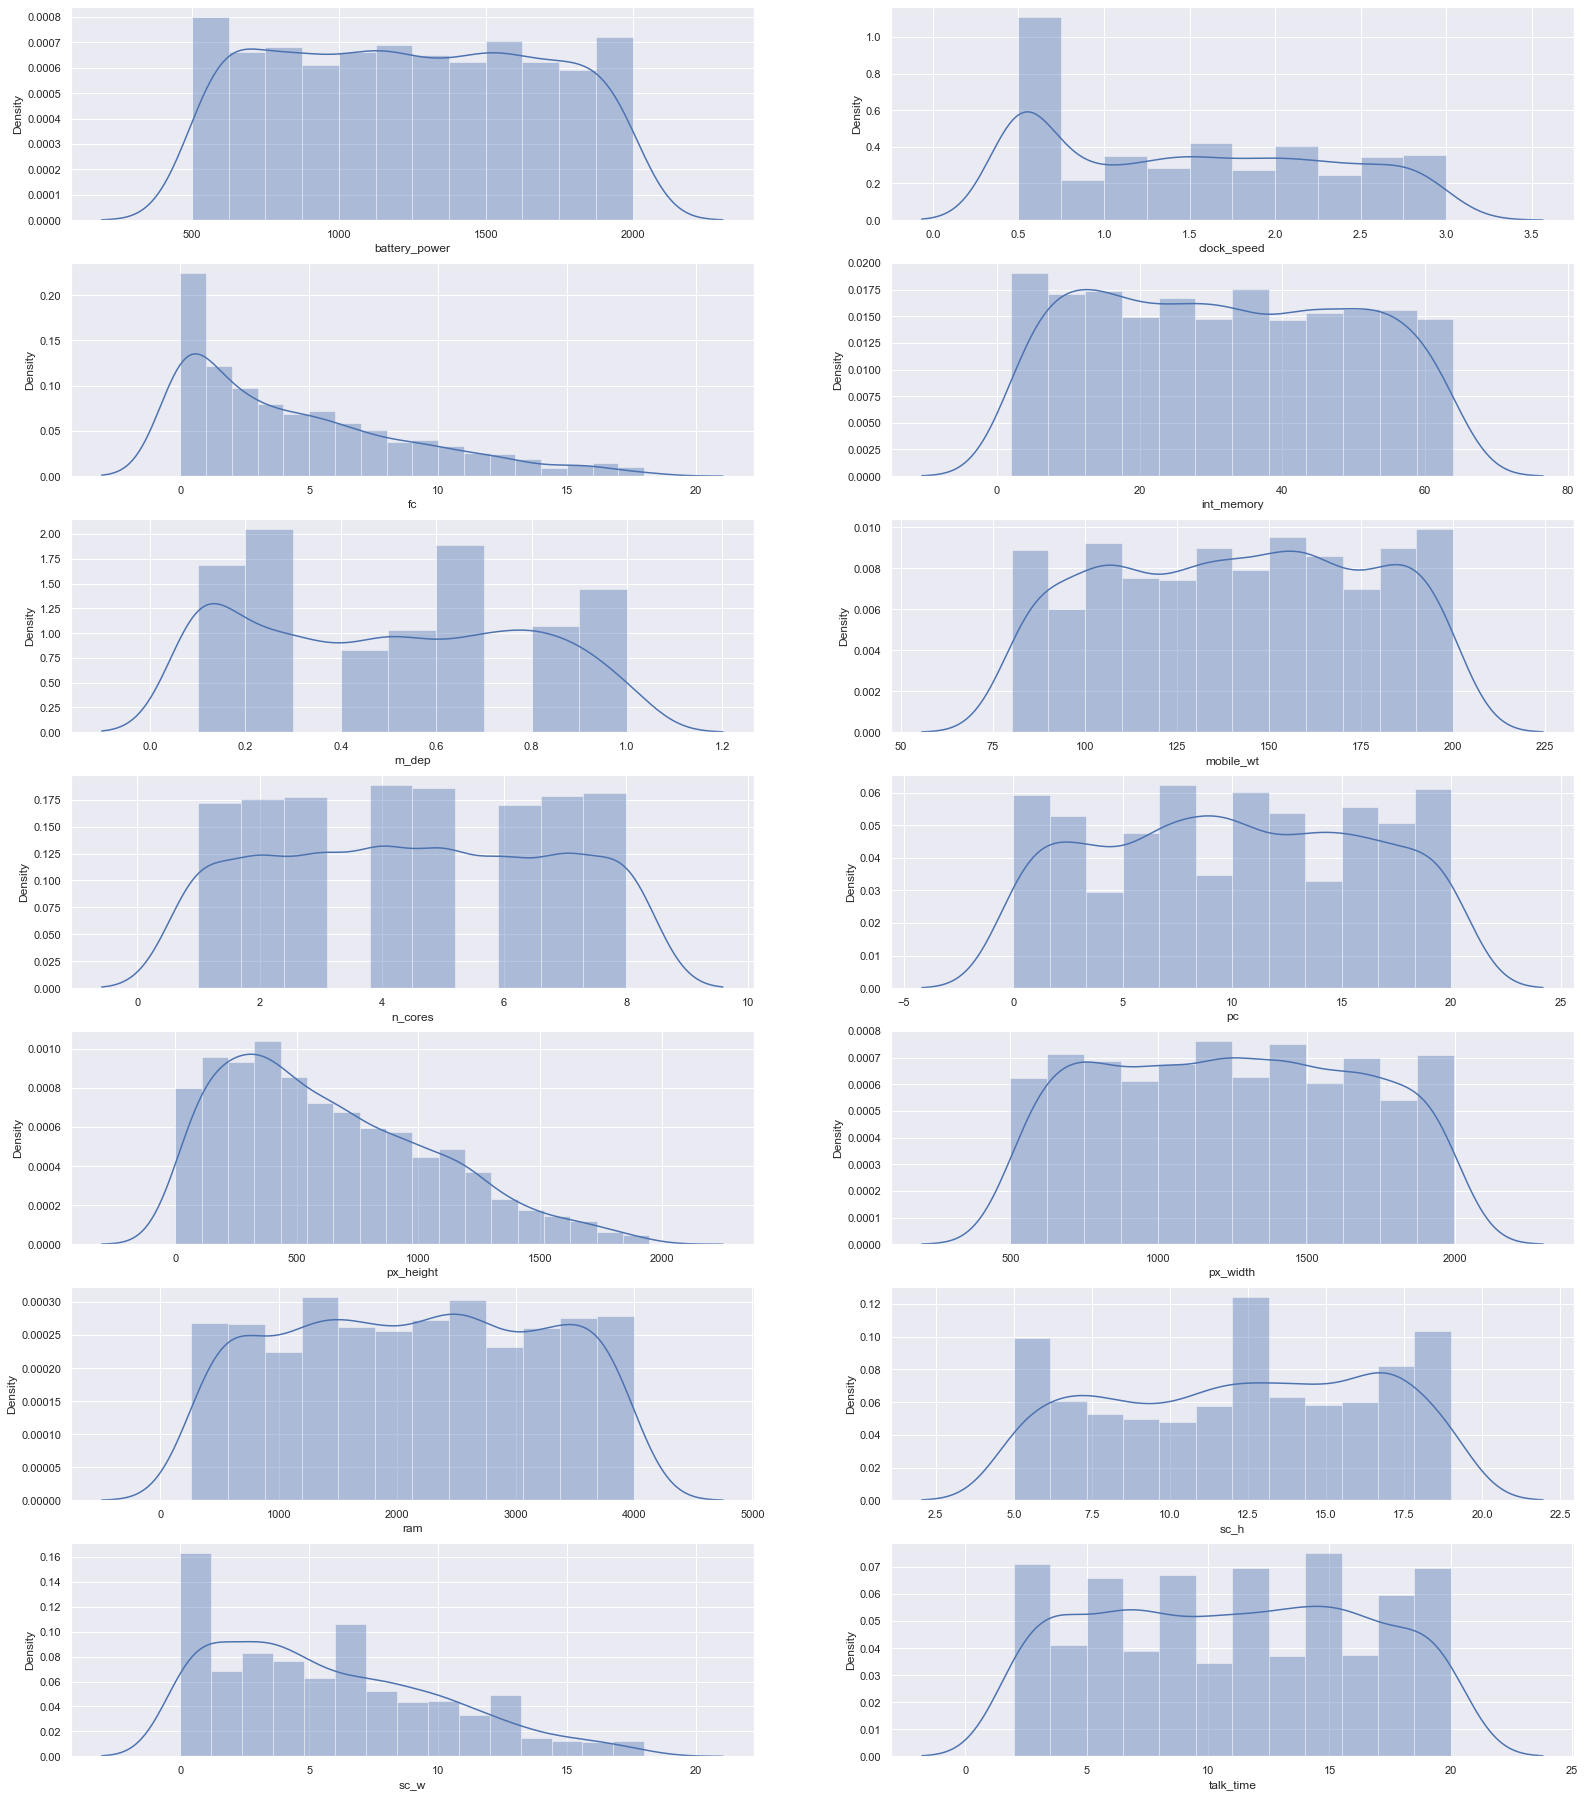

In [38]:
fig, ax = plt.subplots(ncols=2,nrows=7,figsize=(24,30))
x=0
for i in range(7):
  for j in range(2):
    try:
      sns.distplot(df_eda[num[x]],ax=ax[i][j])
      x+=1
    except:
      pass
plt.show()

Visualization display of numerical distribution of data

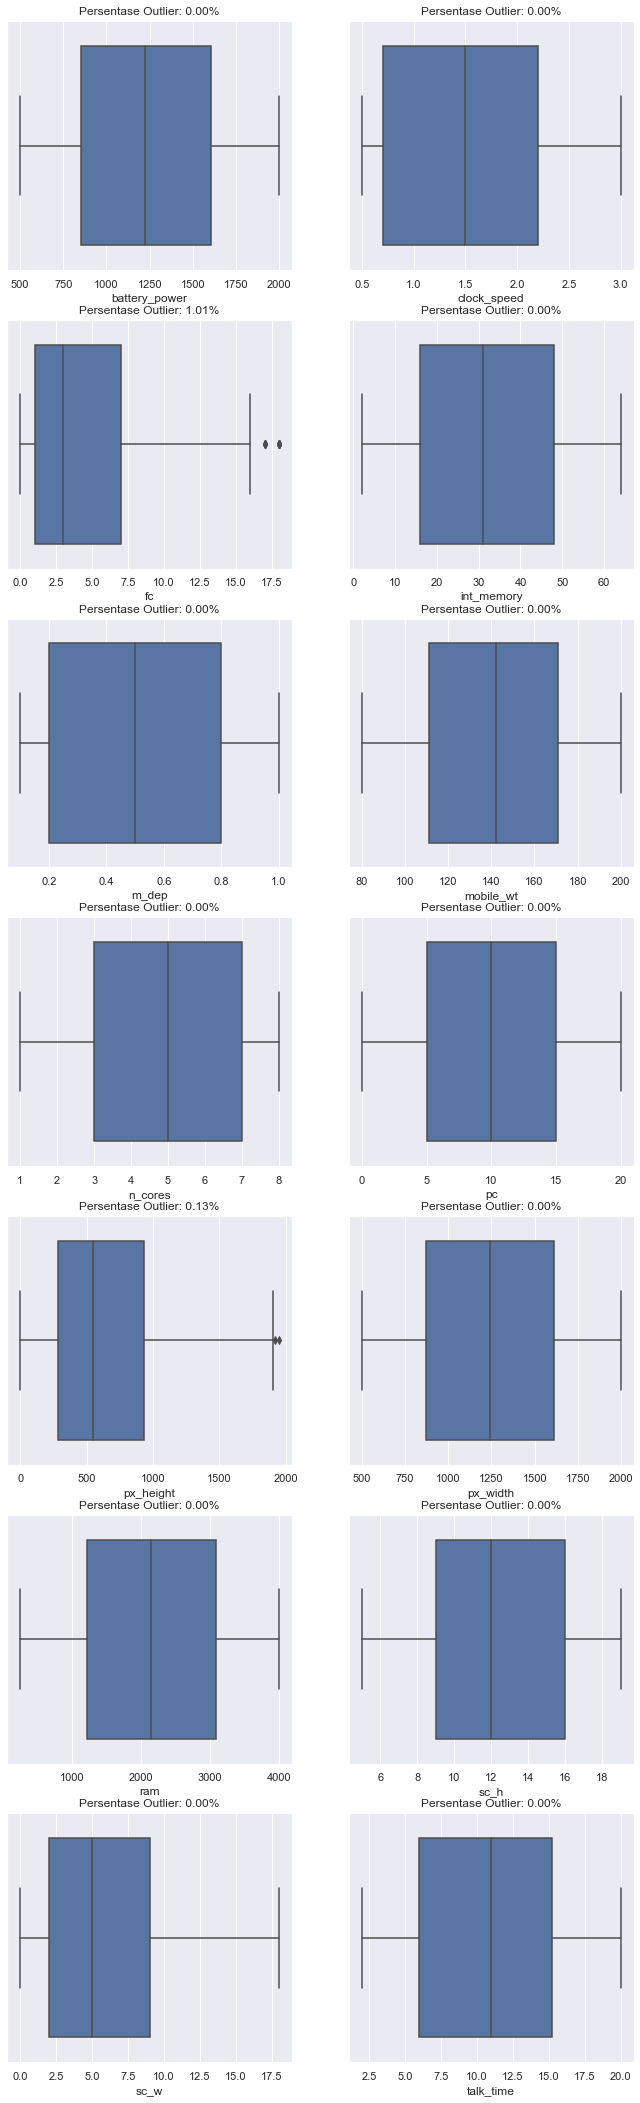

In [39]:
def outlier_analysis(df_eda,col):
  skewness = df_eda[col].skew()
  if skewness>=-0.5 and skewness<=0.5:
    upper = df_eda[col].mean() + 3*df_eda[col].std()
    lower = df_eda[col].mean() - 3*df_eda[col].std()
  else:
    Q1 = df_eda[col].quantile(0.25)
    Q3 = df_eda[col].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5*IQR
    lower = Q1 - 1.5*IQR
  
  no_outliers = df_eda[(df_eda[col]>=lower) & (df_eda[col]<=upper)]
  outliers = df_eda[(df_eda[col]<lower) | (df_eda[col]>upper)]

  return outliers,no_outliers, upper, lower

fig, ax = plt.subplots(ncols=2,nrows=7,figsize=(10,35))
x=0
for i in range(7):
  for j in range(2):
    try:
      out,no_out, up, low = outlier_analysis(df_eda,num[x])
      sns.boxplot(df_eda[num[x]],ax=ax[i][j])
      ax[i][j].set_title('Persentase Outlier: {:.2f}%'.format(len(out)*100/len(df_eda)))
      x+=1
    except:
      pass
plt.show()

Based on the data processing above, it is known that the numeric features that have outliers are the `fc and px_height` features. The `fc` feature has about 1% outlier percentage and the `px_height` feature has about 0.13% outlier percentage. These outliers will be handled using the capping method so that the data is not deleted because it is feared that it will eliminate information that turns out to be important.

### Handling Outlier

In [40]:
wins = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=['fc', 'px_height'])

df_eda_cleaned = wins.fit_transform(df_eda)

Outlier handling uses winsorizer with the capping iqr method because the column is not normal and has a skewness of more than 0.5. only these two columns have outliers so that the other features don't need to handle outliers.

In [41]:
print('before handling: \n', df_eda[num].describe())

before handling: 
        battery_power  clock_speed           fc   int_memory        m_dep  \
count    1492.000000  1492.000000  1492.000000  1492.000000  1492.000000   
mean     1237.507373     1.513271     4.439678    31.947721     0.496649   
std       440.808758     0.813220     4.393579    18.035956     0.289271   
min       501.000000     0.500000     0.000000     2.000000     0.100000   
25%       852.000000     0.700000     1.000000    16.000000     0.200000   
50%      1224.500000     1.500000     3.000000    31.000000     0.500000   
75%      1606.250000     2.200000     7.000000    48.000000     0.800000   
max      1998.000000     3.000000    18.000000    64.000000     1.000000   

         mobile_wt      n_cores           pc    px_height     px_width  \
count  1492.000000  1492.000000  1492.000000  1492.000000  1492.000000   
mean    141.172922     4.518097    10.044906   633.594504  1244.728552   
std      35.083453     2.278484     6.027324   434.516821   429.509071   


In [42]:
print('after handling: \n', df_eda_cleaned[num].describe())

after handling: 
        battery_power  clock_speed           fc   int_memory        m_dep  \
count    1492.000000  1492.000000  1492.000000  1492.000000  1492.000000   
mean     1237.507373     1.513271     4.423592    31.947721     0.496649   
std       440.808758     0.813220     4.347752    18.035956     0.289271   
min       501.000000     0.500000     0.000000     2.000000     0.100000   
25%       852.000000     0.700000     1.000000    16.000000     0.200000   
50%      1224.500000     1.500000     3.000000    31.000000     0.500000   
75%      1606.250000     2.200000     7.000000    48.000000     0.800000   
max      1998.000000     3.000000    16.000000    64.000000     1.000000   

         mobile_wt      n_cores           pc    px_height     px_width  \
count  1492.000000  1492.000000  1492.000000  1492.000000  1492.000000   
mean    141.172922     4.518097    10.044906   633.559651  1244.728552   
std      35.083453     2.278484     6.027324   434.413111   429.509071   
m

Outlier handling results can be viewed from the max value in the `fc` and `px_height` features. feature `fc` before handling outliers has a max value of 18 and after handling outliers its max value becomes 16. The max value in feature `px_height` before handling outliers has a max value of 1949 and after handling outliers it becomes 1908.5. The outlier handling process was successful.

The process carried out in EDA for Modeling:
Dividing data into two dataframes, because the treatment to be applied will differ according to the data type:
1. Categorical Feature
- There is no treatment whatsoever for categorical features because the data is already in the form of numbers which represent meaning


2. Numerical Features
- Calculate skewness values to detect and then handle outliers
- Calculating the comparison between normal distribution data and abnormal distribution data based on the skewness value. The result is that the normal distribution data dominates
- Displays a visualization of the skewness comparison in each column and then handles the outliers using the iqr capping method
- Handling outliers in the `fc','px_height fields


### Feature Selection

#### Feature Selection For Category

### Menggunakan heatmap

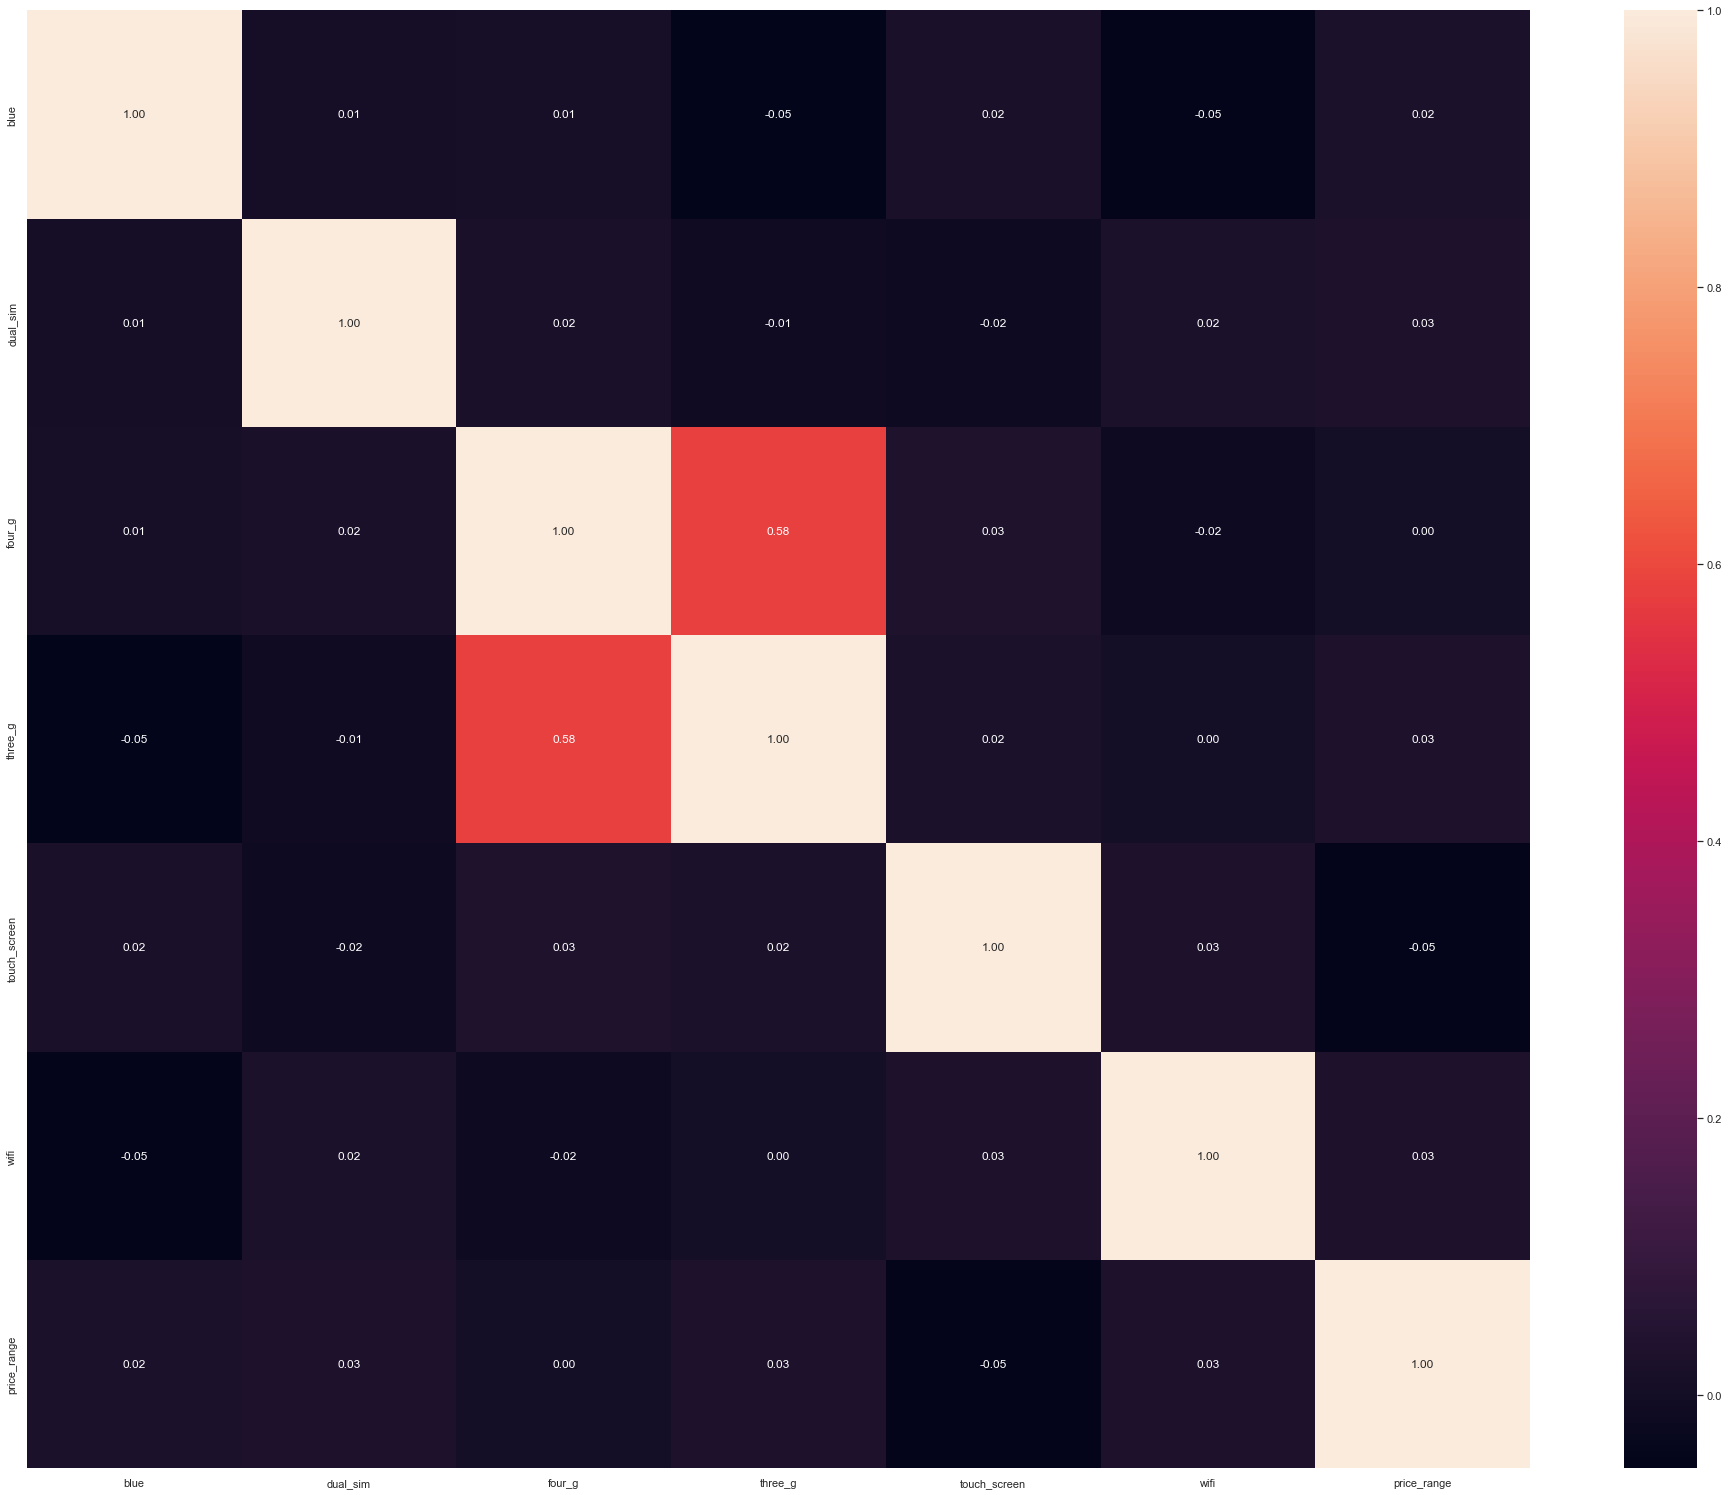

In [43]:
plt.figure(figsize=(30,25))
sns.heatmap(df_cat.corr(), annot=True, fmt='.2f')
plt.show()

Based on the visualization above, the researcher decided not to choose any column from the categorical feature to enter the modeling because it was deemed not to have a significant correlation value to the target column. The value of each feature category is close to 0 so this will make the model's performance less than optimal. To be even more convincing, the researcher will do several other ways to ensure the feature category correlation value to the target column.

### Menggunakan fungsi corr

In [44]:
corr = df_cat.corr()
corr["price_range"].sort_values(ascending=False)

price_range     1.000000
three_g         0.028536
dual_sim        0.026840
wifi            0.026832
blue            0.021378
four_g          0.004129
touch_screen   -0.048193
Name: price_range, dtype: float64

Based on the above information using the corr function, each feature category does not have a significant correlation value to the target column because each feature category has a value close to 0.

### Using mutual info classifier
This method uses dummy data so as not to affect the existing data because the purpose of this method only wants to know the correlation value

In [45]:
df_dummy = df_cat.copy()

In [46]:
X_dummy = df_dummy.drop('price_range',axis=1)
y_dummy = df_dummy['price_range']

In [47]:
# determine the mutual information
mutual_info = mutual_info_classif(X_dummy, y_dummy, random_state=17)
mutual_info

array([0.        , 0.        , 0.01206594, 0.        , 0.        ,
       0.        ])

In [48]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_dummy.columns
mutual_info.sort_values(ascending=False)

four_g          0.012066
blue            0.000000
dual_sim        0.000000
three_g         0.000000
touch_screen    0.000000
wifi            0.000000
dtype: float64

After using the mutual info classifier method, the result is that all feature categories do not affect the target column because the correlation value is close to 0.

After doing the three methods above, the researcher did not enter the feature category into the model because it would make the model's performance not optimal

#### Feature Selection For Numerical

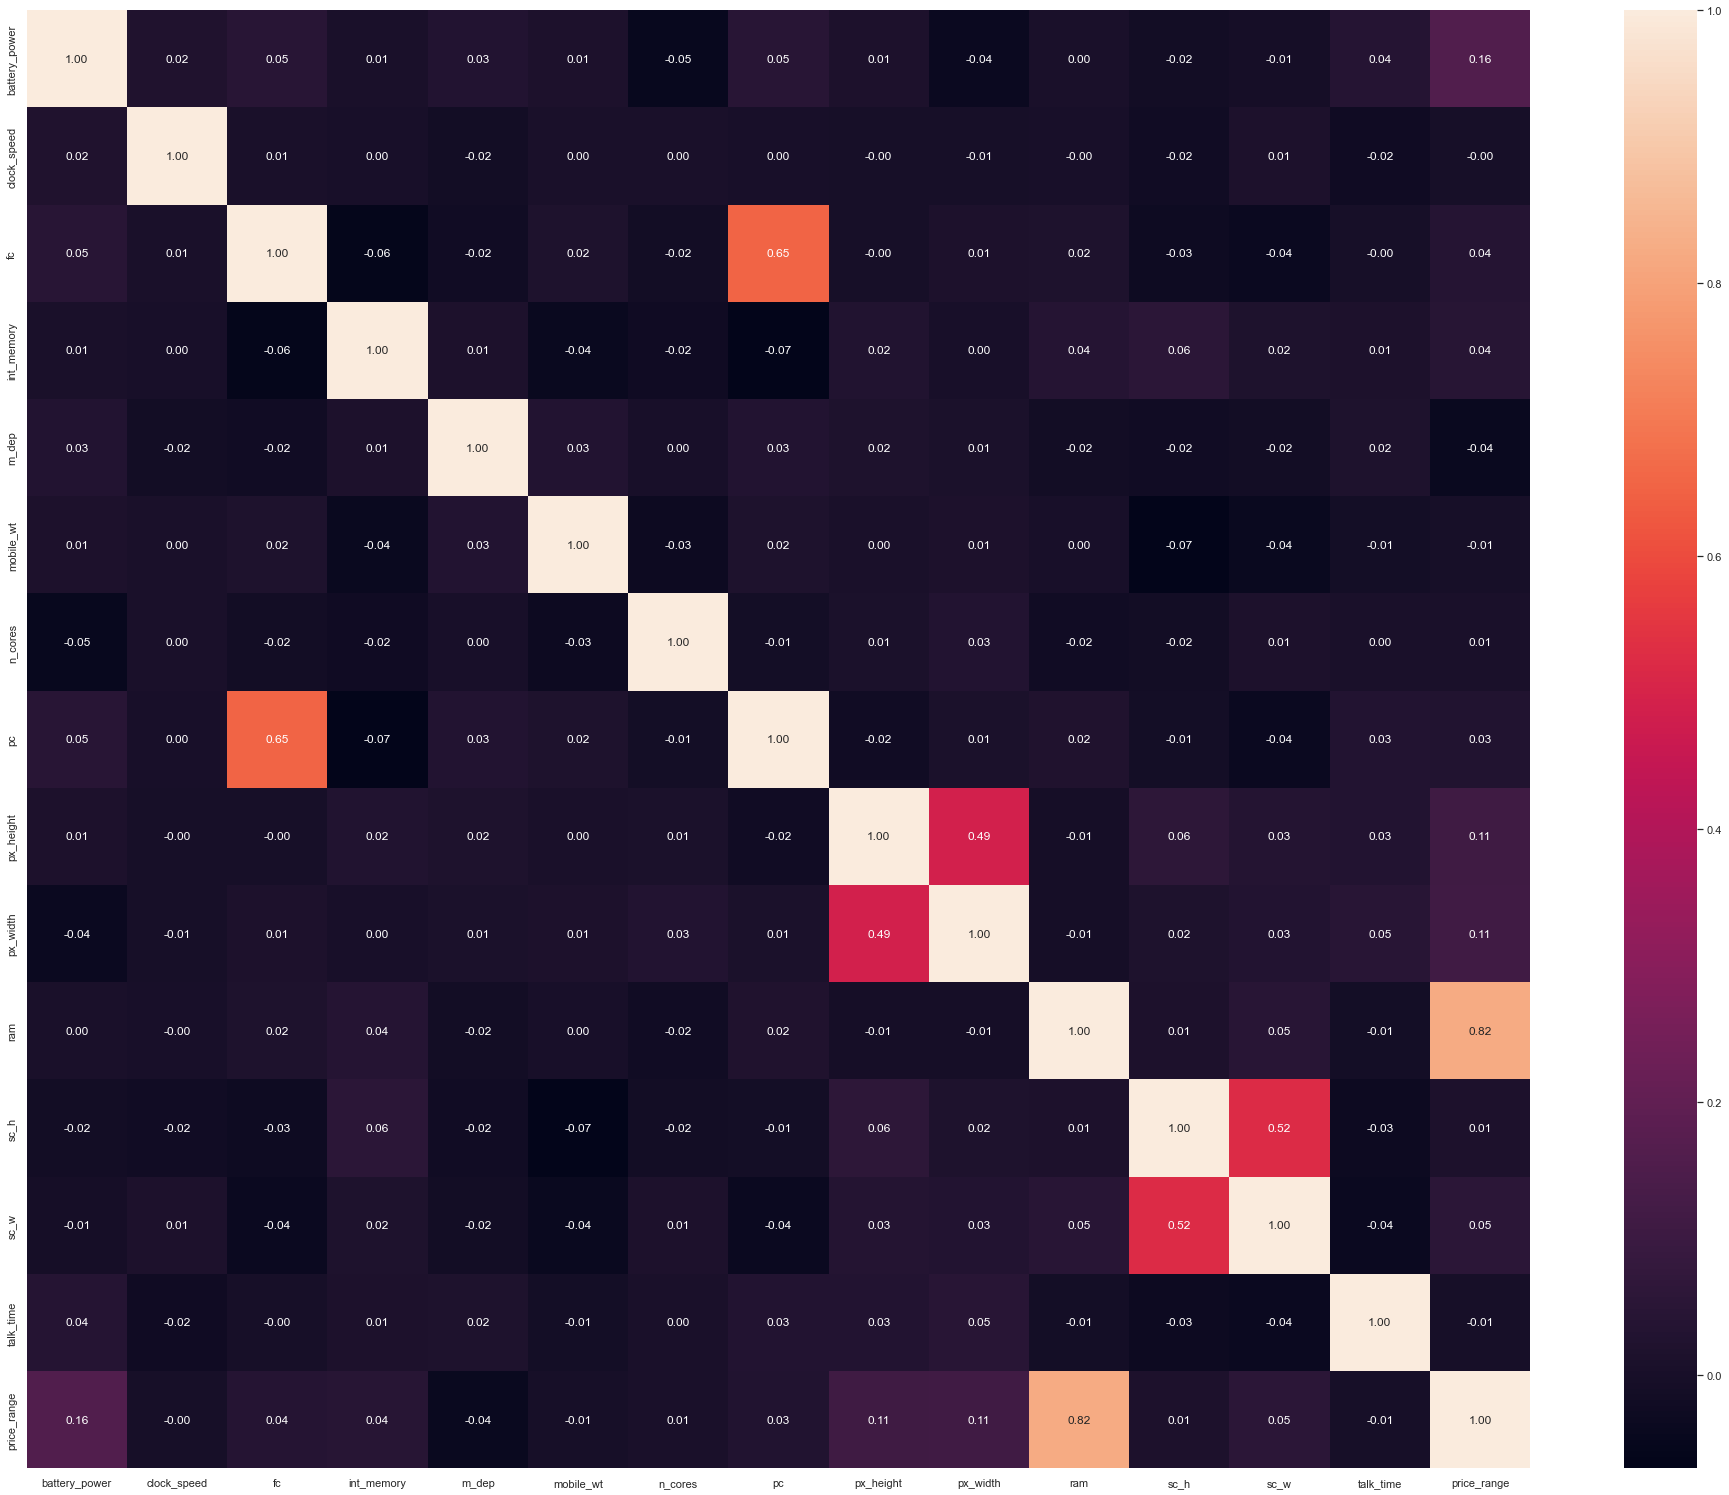

In [49]:
plt.figure(figsize=(30,25))
sns.heatmap(df_eda_cleaned[num+['price_range']].corr(), annot=True, fmt='.2f')
plt.show()

Researchers use a threshold of 0.1 to select features to be included in the model from numerical features.
The researcher selects the features `battery_power`, `px_height`, `px_width`, and `ram` to enter the model. The researcher assesses that the features other than the four features do not really affect the target column because the correlation value is close to 0.

>Based on the feature selection stage of the numeric feature and feature category, the researcher decided to only select features based on the correlation value between the feature and the target
Selected features are:
`'battery_power', 'px_height', 'px_width' and 'ram'`

### Scaling data

Scaling data generally has 2 options, namely by using StandardScaler or MinMaxScaler. In a research, these options can be selected based on the skewness value in each column to find out which data distribution dominates between normal data distribution or abnormal data distribution. If in a study the data is dominated by normal distribution, the scaler used is the StandardScaler, if the non-normal distribution data dominates, the MinMaxScaler will be used.

In [60]:
norm = 0
nonorm = 0
for col in df_eda_cleaned[['battery_power', 'px_height', 'px_width', 'ram']]:
  if df_eda_cleaned[col].skew() >=-0.5 and df_eda_cleaned[col].skew() <0.5:
    norm += 1
  else:
    nonorm +=1

if norm > nonorm:
  scaler = StandardScaler()
else:
  scaler = MinMaxScaler()
scaler

StandardScaler()

Based on the information above, this study will use the StandardScaler because normal distribution data dominates compared to abnormal distribution data

In this milestone project, a pipeline will be created for data preprocessing, which will later be used for the modeling stage. Exploratory Data Analysis (EDA) process - Modeling on the training data above aims to describe what behavior is used for the data train, so that in the pipeline it can be determined what behavior is used

In [50]:
num_pipeline = Pipeline([
    ('outlier', Winsorizer(capping_method='iqr', tail ='both', fold=1.5)),
    ('scaler', StandardScaler())
    ])
num_tr = num_pipeline.fit_transform(X_train[['battery_power', 'px_height', 'px_width', 'ram']])
num_tr

array([[-0.16908093,  0.65729152, -0.3929722 , -0.52517975],
       [ 1.37632469, -0.23156154, -0.84480211, -0.38098669],
       [ 1.22428038, -0.18550698, -0.86343428, -0.53996878],
       ...,
       [-1.28558543,  0.50300874, -0.14609606,  0.3399786 ],
       [-1.0563843 , -0.72895081,  1.3048835 ,  0.59693803],
       [-0.95880362,  0.80236339,  0.10776713,  1.23194208]])

In [51]:
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, ['battery_power', 'px_height', 'px_width', 'ram'])
])

The steps above are a way to do winsorizer and scaling using the pipeline method. The reason researchers use pipelines at this stage is because it makes it easier to go to the preprocessing, model inference and even deployment stages.

In [52]:
train_tr = full_pipeline.fit_transform(X_train)

In [53]:
train_tr

array([[-0.16908093,  0.65729152, -0.3929722 , -0.52517975],
       [ 1.37632469, -0.23156154, -0.84480211, -0.38098669],
       [ 1.22428038, -0.18550698, -0.86343428, -0.53996878],
       ...,
       [-1.28558543,  0.50300874, -0.14609606,  0.3399786 ],
       [-1.0563843 , -0.72895081,  1.3048835 ,  0.59693803],
       [-0.95880362,  0.80236339,  0.10776713,  1.23194208]])

Based on the EDA for Modeling, the following information is obtained:
- Outliers are handled by windsoririzer with capping method of iqr because the column has skewness above 0.5
- The selected features to enter the model are `'battery_power', 'px_height', 'px_width' and 'ram'`
- Perform Winsorizer and scaling functions (StandarScaler) by using a pipeline to make it more efficient

## 5.Data Preprocessing : Data Test

At this stage we will test the test data using the test data that has been separated in the previous steps. The test data has a portion of 25% of the overall data after separating the inference data from the earliest data.

In [61]:
X_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1722,1831,1,2.3,0,3,1,44,0.2,148,7,14,437,1113,2460,10,5,18,1,0,0
316,1648,0,0.7,0,6,1,64,0.8,170,4,9,1153,1876,610,8,1,6,1,1,0
151,742,0,2.2,1,4,0,56,0.2,190,7,14,577,1359,3557,16,11,12,0,1,1
1149,1396,0,1.5,1,0,1,44,0.1,118,6,1,173,1843,1386,7,1,8,1,1,1
1284,991,0,2.0,0,2,1,12,0.3,158,5,6,1209,1678,2014,11,9,10,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1485,742,1,2.3,0,0,0,21,0.7,104,8,1,875,925,331,11,8,7,1,0,0
979,1866,1,2.5,1,3,1,47,0.8,89,5,9,358,1782,1444,7,4,20,1,0,0
689,705,1,0.5,0,5,1,57,0.9,155,6,9,1114,1374,1509,15,11,18,1,1,1
164,1441,0,2.1,1,11,1,3,0.1,118,8,17,577,1071,2317,16,4,7,1,0,1


In [62]:
test_tr = full_pipeline.transform(X_test)

## 6.Model Definitiom

In this section we will compare the performance between 4 models:
- LogisticReg
- SVC
- DecisionTree Classifier
- RandomForest Classifier

The models above are very suitable to overcome the problems in this study. However, in order to be more effective and efficient, researchers only choose one model by selecting using cross validation

In [63]:
logreg = LogisticRegression(random_state=0)
svc = SVC(random_state=0)
dtc = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)

## 7.Model Training

In [64]:
#Logistic regression
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [65]:
#SVM
svc.fit(X_train, y_train)

SVC(random_state=0)

In [66]:
#DecisionTreeClassifier
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [67]:
#RandomForestClassifier
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

## 8.Model Evaluation

### Cross Validation

Cross validation is an additional method of data mining techniques that aims to obtain maximum accuracy results. This method is often also called k-fold cross validation where the experiment is k times for one model with the same parameters
In general, we will compare n models in this cross validation, in another sense the function of using the cross validation method is:
- To find out the performance of an algorithm model by conducting experiments k times
- To increase the performance level of the model
- To process data sets with balanced classes

The scoring used is accuracy because the data in the target column is balanced so that both classes can be reviewed.

In [68]:
#Logistic Regression
log_model_train_cross_val = cross_val_score(logreg, 
                                           X_train, 
                                           y_train, 
                                           cv=5, 
                                           scoring='accuracy')

print('accuracy Score - Mean - Cross Validation : ', log_model_train_cross_val.mean())
print('accuracy Score - Std - Cross Validation  : ', log_model_train_cross_val.std())

accuracy Score - Mean - Cross Validation :  0.8920944535476195
accuracy Score - Std - Cross Validation  :  0.013587963952503711


In [69]:
#SVM
svm_model_train_cross_val = cross_val_score(svc, 
                                           X_train, 
                                           y_train, 
                                           cv=5, 
                                           scoring='accuracy')

print('accuracy Score - Mean - Cross Validation : ', svm_model_train_cross_val.mean())
print('accuracy Score - Std - Cross Validation  : ', svm_model_train_cross_val.std())

accuracy Score - Mean - Cross Validation :  0.9819038854346704
accuracy Score - Std - Cross Validation  :  0.0026802437083461883


In [70]:
#Decission Tree

dt_modelt_rain_cross_val = cross_val_score(dtc, 
                                           X_train, 
                                           y_train, 
                                           cv=5, 
                                           scoring='accuracy')

print('accuracy Score - Mean - Cross Validation : ', dt_modelt_rain_cross_val.mean())
print('accuracy Score - Std - Cross Validation  : ', dt_modelt_rain_cross_val.std())

accuracy Score - Mean - Cross Validation :  0.9450360261273596
accuracy Score - Std - Cross Validation  :  0.00866783094800971


In [71]:
#Random Forest

rf_modelt_rain_cross_val = cross_val_score(rfc, 
                                           X_train, 
                                           y_train, 
                                           cv=5, 
                                           scoring='accuracy')

print('accuracy Score - Mean - Cross Validation : ', rf_modelt_rain_cross_val.mean())
print('accuracy Score - Std - Cross Validation  : ', rf_modelt_rain_cross_val.std())

accuracy Score - Mean - Cross Validation :  0.9497250342304326
accuracy Score - Std - Cross Validation  :  0.01201602309031178


In [72]:
rata = []
dev = []
for i in [log_model_train_cross_val,svm_model_train_cross_val,dt_modelt_rain_cross_val,rf_modelt_rain_cross_val]:
    rata.append(i.mean())
    dev.append(i.std())

In [73]:
model = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest']
hasil_cros_validation = pd.DataFrame(model)
hasil_cros_validation['mean']=rata
hasil_cros_validation['std']=dev

In [74]:
hasil_cros_validation.sort_values(by= 'mean' , ascending = False) 

,0,mean,std
1,SVM,0.981904,0.002680
3,Random Forest,0.949725,0.012016
2,Decision Tree,0.945036,0.008668
0,Logistic Regression,0.892094,0.013588


Based on the comparison of the mean cross validation, the highest mean is in the SVM model because the value is close to 1. If it is reviewed based on the standard deviation, the SVM model is still recommended because the value is close to 0.

The next step is to measure and review the accuracy value of the SVM model with baseline parameters after using hyperparameter tuning. The reason this model is reviewed from the accuracy score is because Accuracy describes how accurately the model can correctly classify. So, accuracy is the ratio of correct predictions (positive and negative) to the entire data. In other words, accuracy is the degree of closeness of the predicted value to the actual (actual) value. Another reason is because the existing data does not experience data imbalance so it is worth reviewing the accuracy value.
Accuracy formula is as follows:
> Accuracy = (TP + TN ) / (TP+FP+FN+TN)

The review is carried out by making class 1 (expensive cellphones) a positive value
- TP: True Positive, the TP case is a case where the cellphone is predicted to be expensive and it is really expensive
- TN: True Negative, the TN case is a case where the cellphone is predicted to be cheap and it is really cheap
- FP : False Positive, the FP case is a case where the cellphone is predicted to be cheap but turns out to be expensive
- FN : False Negative, the FN case is a case where the cellphone is predicted to be expensive but turns out to be cheap

### Before Hyperparameter tuning

In [75]:
svc.fit(train_tr, y_train)

svc_train = svc.predict(train_tr)
svc_test = svc.predict(test_tr)

print(classification_report(y_train, svc_train))
print(classification_report(y_test, svc_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       748
           1       0.99      0.99      0.99       744

    accuracy                           0.99      1492
   macro avg       0.99      0.99      0.99      1492
weighted avg       0.99      0.99      0.99      1492

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       250
           1       0.99      0.98      0.99       248

    accuracy                           0.99       498
   macro avg       0.99      0.99      0.99       498
weighted avg       0.99      0.99      0.99       498



In this study, the accuracy value of the SVM model before using hyperparameter tuning was 0.99 when training with data train, which means the model was able to predict 99% correctly during training. At the time of the test, the model was able to correctly predict 99%. From the results of the train and test, the SVM model before using hyperparameter tuning or baseline parameters was declared 'Good Fit' because when the machine was in the learning and testing stages it had an accuracy of 99%.

**Hyper-param Tuning**

In [115]:
params = [
    {'C': [1.0, 2.0, 3.0, 4.0],
     'kernel': ['linear', 'poly', 'rbf'],
     'gamma': ['scale', 'auto'],
     'max_iter': [-1, 5, 10, 15]},
  ]

svm_model = SVC(random_state=0)

grid_search = GridSearchCV(svm_model, params, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
grid_search.fit(train_tr, y_train)

GridSearchCV(cv=5, estimator=SVC(random_state=0),
             param_grid=[{'C': [1.0, 2.0, 3.0, 4.0], 'gamma': ['scale', 'auto'],
                          'kernel': ['linear', 'poly', 'rbf'],
                          'max_iter': [-1, 5, 10, 15]}],
             return_train_score=True, scoring='accuracy')

In [116]:
grid_search.best_params_

{'C': 2.0, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1}

In [111]:
grid_search.best_score_

0.9886085609750623

In [112]:
grid_search.best_estimator_

SVC(C=2.0, kernel='linear', random_state=0)

In [113]:
model = grid_search.best_estimator_

**combine pipeline: preprocess + model**

In [81]:
full_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('outlier',
                                                  Winsorizer(capping_method='iqr',
                                                             fold=1.5,
                                                             tail='both')),
                                                 ('scaler', StandardScaler())]),
                                 ['battery_power', 'px_height', 'px_width',
                                  'ram'])])

In [114]:
all_process = Pipeline([
    ("preprocess", full_pipeline),
    ("classification",model)
])

all_process.fit(X_train, y_train)
hasil_train = all_process.predict(X_train)
hasil = all_process.predict(X_test)

print(classification_report(y_train, hasil_train))
print(classification_report(y_test, hasil))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       748
           1       0.99      0.99      0.99       744

    accuracy                           0.99      1492
   macro avg       0.99      0.99      0.99      1492
weighted avg       0.99      0.99      0.99      1492

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       250
           1       0.99      0.98      0.99       248

    accuracy                           0.99       498
   macro avg       0.99      0.99      0.99       498
weighted avg       0.99      0.99      0.99       498



After the model uses parameters based on hyperparameter tuning, the result is that when the model is learned, it has an accuracy of 0.99 or 99%, the machine is able to predict correctly. When the model enters the test, the accuracy value is only 99%. This hyperparameter is the best result, when the parameter is added in parameter C and max iter, the accuracy of the model decreases significantly. Researchers have conducted trial and error many times so they conclude that the best parameter with hyperparameter tuning is
-'C': 2.0,
- 'gamma': 'scale',
- 'kernel': 'linear',
- 'max_iter': -1

## 9.Model Inference

In [83]:
inference.reset_index(drop=True, inplace=True)

In [84]:
y_pred_inf =all_process.predict(inference)

In [85]:
y_predRF_inf_df = pd.DataFrame(y_pred_inf, columns=['price_range - prediction'])

In [86]:
hasil_inf = pd.concat ([inference,y_predRF_inf_df ],axis=1)
hasil_inf

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,price_range - prediction
0,1965,0,0.5,0,6,1,4,1.0,84,7,9,977,1660,3535,17,0,16,1,1,1,1,1
1,694,1,1.8,1,15,0,36,0.4,193,4,20,983,1230,3676,12,8,5,1,0,1,1,1
2,1867,0,2.3,0,0,1,9,0.1,191,6,3,712,1442,990,6,1,2,1,0,1,0,0
3,930,0,2.1,1,0,0,54,0.9,80,1,13,1569,1763,1743,7,1,9,0,1,0,1,0
4,1084,1,2.6,0,3,1,40,0.9,107,3,11,322,771,1945,15,4,10,1,1,0,0,0
5,688,0,2.5,1,0,0,57,0.8,131,7,3,426,1964,3745,17,1,4,0,1,0,1,1
6,848,1,2.1,1,10,1,19,0.8,148,7,18,176,1029,3359,10,0,14,1,0,0,1,1
7,1760,0,1.4,1,5,0,63,0.8,127,8,19,1382,1383,2053,19,12,16,0,1,0,1,1
8,1527,0,2.7,0,10,1,60,0.1,154,5,14,526,1116,2078,5,3,11,1,1,1,1,1
9,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,1,1


At the model inference stage, the model used at this stage is the SVM model using hyperparameter tuning. When the model is given new data, the model can run well so that it can make predictions to determine whether the cellphone enters the cheap class or the expensive class. From 10 data inferences, the model is able to correctly predict 9 data out of 10 existing data.

In [88]:
# save model
pickle.dump(all_process, open("h8dsft_P1M2_hp_pred.pkl", "wb"))

In [89]:

set_config(display='diagram')

In [90]:
all_process

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('outlier',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['battery_power', 'px_height',
                                                   'px_width', 'ram'])])),
                ('classification',
                 SVC(C=2.0, kernel='linear', random_state=0))])

**MODEL INFERENCE - DEPLOY**

In [91]:
# STEP 1 - Import saved model
model = pickle.load(open("h8dsft_P1M2_hp_pred.pkl", "rb"))

In [92]:
# STEP 2 - Prepare input data from user
# skipped
inf = df.head(1)
inf

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,0


In [93]:
# STEP 3 - model predict input data
clas = model.predict(inf).tolist()[0]
clas

0

In [94]:
# STEP 4 - interpretation for human language
if clas == 0:
    print('Low')
elif clas == 1:
    print('Medium')
else:
    print('High')


Low


## 10. Conclusion
Based on this research, researchers can conclude as follows:

1. The data does not experience a data imbalance condition because in the target column, namely the `price_range` column, it is known that there are 1,000 buyers of cheap cellphones and expensive cellphones each.
2. Cheap cellphones use the most processor 4 and expensive cellphones use the most processor 5 and processor 7.
3. Talktime for cheap and expensive cell phones has a taktime duration of around 7.15 hours to around 15 hours.
4. Cheap cellphones don't have a battery capacity of 1200 mAh, while expensive cellphones have a maximum capacity of 1998 mAh.
5. Cheap cellphones have the lowest RAM of only 256mb, the average range is between 703mb to 1700mb and the highest reaches 2881mb. Expensive cellphones, have RAM as low as 1185mb, the average has a range between 2547mb to 3555mb and the highest reaches 3998mb.
6. The selected features to enter the model are `'battery_power', 'px_height', 'px_width', and 'ram'` based on the feature's correlation value with the target.
7. Perform the Winsorizer function by capping the iqr method because the outliers are in data that has an abnormal distribution and perform scaling with StandardScaler because the data is dominated by a normal distribution.
8. Research is faced with a choice of 4 models, namely
- LogisticReg
- SVC
- DecisionTree Classifier
- RandomForest Classification
In order to determine the best model for this study, its performance was measured by cross validation to compare the accuracy score to the mean and standard deviation. The result is that the SVC model was chosen because it has the highest mean of 0.981904 and a standard deviation of 0.002680 which is low because the value is close to 0.
9. The accuracy value generated by the SVC model with baseline parameters and hypertuning parameters has a `Good fit` value because the results of the accuracy values ​​are similar
10. The following parameters are used when using hyperparameter tuning:
-'C': 2.0,
- 'gamma': 'scale',
- 'kernel': 'linear',
- 'max_iter': -1
11. This model is suitable for use even in deployment, especially used by Bob in running his company to conduct surveys before entering the mobile phone business market with tough competition